# ANN - Exercise


<i>Iris van den Boomen<br>
AI-A-RB01</i>

For this assignment I decided to follow a tutorial [Classify Handwritten Digits using Python & Artificial Neural Network for Beginner](https://www.youtube.com/watch?v=FkB0b-jUSbU). The reason for that is because I wanted to understand ANN better, and by following a tutorial it is easier for me to understand. I added some markdown to explain the code, but also for me to understand and remember what is done.

## About the dataset - Handwritten Digit Recognition on MNIST Dataset


The dataset has 70000 labeled images. 60000 for training and 10000 for testing. Each image has 28 by 28 pixels.

## Import the packages

The following packages are imported:
- NumPy: used for working with numerical data in Python
- Keras: a deep learning API written in Python, running on top of the machine learning platform TensorFlow. Developed with a focus on enabling fast experimentation.
    - With Keras, the model <b>Sequential</b> is imported (useful for a plain stack of layers where each layer has exactly one input tensor and one output tensor)
    - Also with Keras,  layers are imported. There are a lot of different types of layers, but we use <b>Dense</b> and <b>Flatten</b> here. <b>Dense</b> is the most common and frequently used layer. It is a layer which is deeply connected with its preceding layer. This  means the neurons of the layer are connected to every neuron of its preceding layer. The <b>Flatten</b> layer is used to convert the data into a 1-dimensional array for inputting it to the next layer. 
- Matplotlib: a comprehensive library for creating static, animated, and interactive visualizations in Python.


In [147]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

## Import the data

The dataset can be imported by using Keras. It is available there. Then, the loaded dataset is assigned to four variables:
- train_img: the training images which are used to train the model
- train_lab: the corresponding labels for the training images (number from 0 to 9)
- test_img: the test images used to evaluate the performance of the trained model
- test_lab: the corresponding labels for the testing images (number from 0 to 9)

In [148]:
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

## Pre-processing the data

The data is already pre-processed, it only needs to be normalized. Now, the pixel values are in the range of 0 to 255, but this should be change to a range of 0 to 1. One of the reasons for that is that computation becomes easier and faster.

In [149]:
train_img = keras.utils.normalize(train_img, axis=1)
test_img = keras.utils.normalize(test_img, axis=1)


## Defining the model

The imported <b>Sequential</b> model is used. It provides sequences of layers. Sequential allows you to build a neural network by stacking layers one on top of the other.<br> The next step is to look at the layers. The data is flattened from a 2D array of 28 by 28 pixels into a 1D array of 784 nodes (28x28), that is the input layer. A Dense layer is added, which has 300 neurons and a Rectified Linear Unit (ReLU) activation function. This function is used in cases where a value is less than 0. If the value is less than 0, make it 0. Every neuron in that layer is connected to every neuron in the previous layer. Then another layer is added with 200 neurons and another with 100 neurons. All these are hidden layers. The last layer is the output layer. It has 10 neurons (representing 10 classes). Softmax is used to convert the output into probability scores for each class from 0 to 9.

In [150]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300, activation="relu")) # 3 layers, 300 neurons
model.add(Dense(200, activation="relu")) # 200 neurons
model.add(Dense(100, activation="relu")) # 100 neurons
model.add(Dense(10, activation="softmax")) # 10 neurons

## Compiling the model

To compile the model, three aspects are important:
- Optimizer: optimizers are algorithms that adjust the model's parameters during training to minimize a loss function. They help to improve a deep learning model's performance. There are several optimizers, such as <b>Adaptive Moment Estimation(Adam)</b>, <b>Stochastic Gradient Descent (SGD)</b>, <b>Root Mean Square Propagation (RMSprop)</b>, and more. <b>Adam</b> is useful for several reasons, a few are: adaptive learning rates (it adapts the learning rates for each parameter individually), momentum-like behaviour (combines elements of both RMSprop and Momentum) and can handle problems where the optimal solution lies in a wide range of parameter values.
- Loss function: this is a mathematical function that quanitifies the difference between predicted and actual values in the model. It measures the model's performance and guides the optimization process by providing feedback. sparse_categorical_crossentropy is used because there are multiple classes. If there are multiple classes, categorical_crossentropy needs to be used. If there is only two classes (so for binary problems), binary_crossentropy is used.
- Metrics: there are several options here as well, such as accuracy, mean squared error, etc. In this case accuracy is used to see how accurate the model is.

In [151]:
from tensorflow.keras.optimizers import Adam

# customer_learning_rate = 0.1

# custom_optimizer = Adam(learning_rate=customer_learning_rate)
# model.compile(custom_optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

custom_optimizer = Adam()
model.compile(custom_optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

The following code is used to show what the current learning rate is.

In [152]:
# current_learning_rate = model.optimizer.get_config()['learning_rate']

# print(f"The current learning rate is: {current_learning_rate}") 

When no learning rate is specified, the learning rate is 0.001.

## Fitting the model

When fitting the model, the fit method is used. The model needs to learn, so it is fitted on the training data. The parameters <b>train_img</b> and <b>train_lab</b> are used, just like <b>epochs</b>. This parameter defines the number of times that the learning algorithm will work through the entire training dataset. In this case it will be 10 times.

In [153]:
model.fit(train_img, train_lab, epochs=10)
# model.fit(train_img, train_lab, epochs=20)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2205 - accuracy: 0.9324
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0934 - accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0620 - accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0378 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0311 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0251 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

## Evaluating the model

To check how good the model performed with the test data, the metrics <b>test_img</b> and <b>test_lab</b> are used.

In [154]:
test_loss, test_accuracy = model.evaluate(test_img, test_lab)
print(f'Test Loss: {test_loss * 100:.2f}%')
print(f'Accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 1ms/step - loss: 0.0998 - accuracy: 0.9773
Test Loss: 9.98%
Accuracy: 97.73%


As a result test loss is 9.98% and the accuracy is 97.7%. The test loss is a numerical measure of how well the model is performing on the test data. If it is a lower value, it indicates a better performance, because it means that the model's predictions are closer to the true labels.
The  accuracy is showing how good the model is performing. Since it is almost 100%, this means that it is performing really good and is making correct predictions.

<i>When increasing the number of epochs, the accuracy improves a tiny bit (to 97.97%), but the test loss gets slightly worse (to 11.93%)<br><br>
When changing the learning rate to 1, the accuracy is 10.15 and the lest loss is 240.43%, which doesn't make a lot of sense. Learning rate of 1 is very bad. When looking at the images, you can also see the results. Everything is predicted as 1.<br><br>
When the learning rate is  0.01, the test loss is 21.34% and the accuracy is 96.69%. This is not too bad, but could be improved.<br><br>
when the learning rate is 0.0001, the test loss is 8.37% and the accuracy is 97.55%. </i>

## Make predictions

We will look at the first 10 images. The predict function is a method to get predictions from a trained model. The print predictions contain the predicted values for each of the 10 test images.

In [155]:
pred = model.predict(test_img[:10])
print(pred)


1/1 [==============================] - 0s 65ms/step
[[6.5893957e-19 9.2342952e-13 3.6151813e-13 4.0882329e-09 6.2820632e-14
  1.6626779e-17 2.4120620e-22 1.0000000e+00 1.7362882e-16 1.7067221e-11]
 [1.1904237e-14 1.3442769e-08 1.0000000e+00 6.6910778e-13 3.8782736e-12
  1.6898940e-15 2.4708582e-12 6.3948877e-12 1.9847444e-14 2.3738380e-18]
 [4.3364518e-10 9.9998617e-01 2.8348946e-08 1.8886397e-10 7.4940498e-09
  2.8198463e-10 2.7386515e-10 7.0460978e-06 6.7434366e-06 5.2767394e-08]
 [9.9999583e-01 2.6418191e-11 6.1239600e-09 8.3898449e-10 2.1279971e-09
  9.8371401e-11 4.2103316e-06 1.9519424e-11 2.1442390e-11 1.6793445e-08]
 [5.1321356e-12 5.8185092e-09 1.1724095e-07 2.4484431e-14 9.9997079e-01
  1.4719156e-13 6.7247430e-11 4.9130325e-08 5.6616213e-12 2.9076449e-05]
 [2.1666798e-10 9.9996567e-01 3.2511651e-09 4.2117723e-11 1.3893238e-08
  1.9852548e-11 1.7534521e-11 2.2553415e-05 1.1572936e-05 2.2601321e-07]
 [1.6161990e-12 7.9638616e-09 5.2225012e-08 5.7722425e-12 9.9998069e-01
  1.24

The indices of the classes are printed with the highest predicted probabilities for each of the 10 test images. In the first row, the highest accuracy is at index 7, so the prediction is 7. To make it easier to see, we only only print the predicted and the actual label for each of the rows. To find the index with the highest predicted probability, np.argmax is used. We then print the predicted ones and the tested ones (the true labels of the handwritten digits)

In [156]:
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


The output is actually the same, which is really good. We already knew it was going to be really accurate, because of a test accuracy of 97.8%. Now we will take a look at the handwritten digits with the value and the prediction.

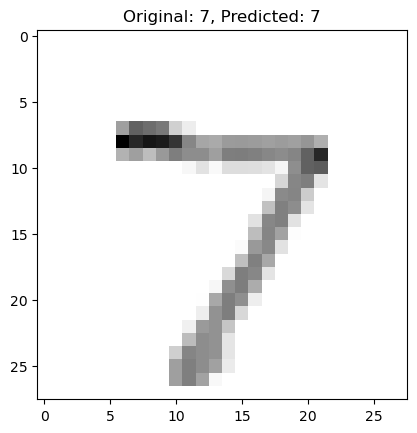

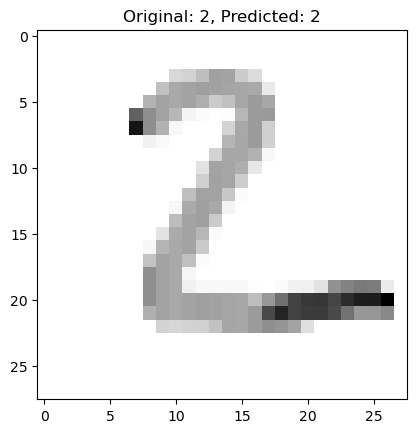

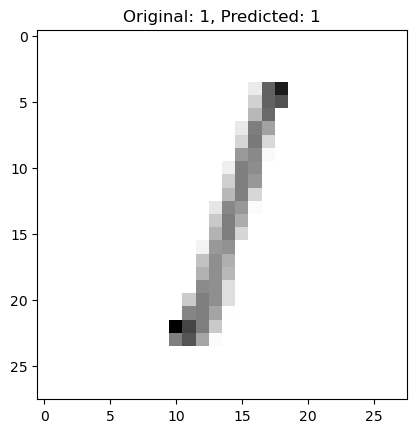

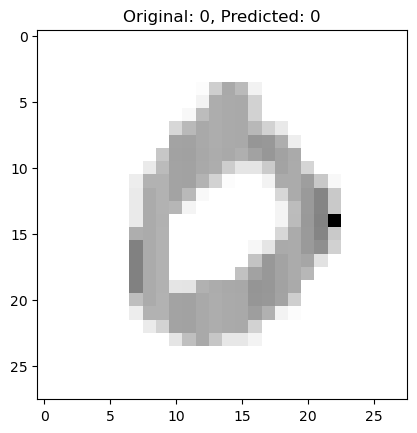

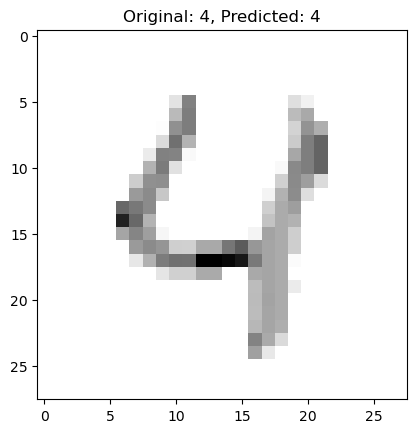

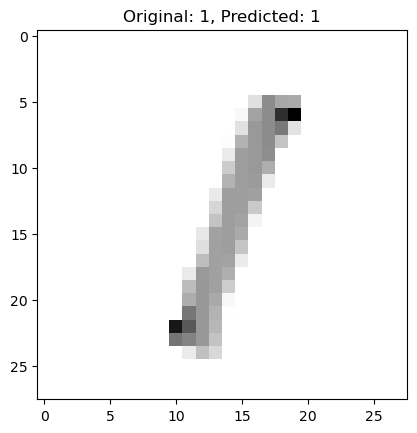

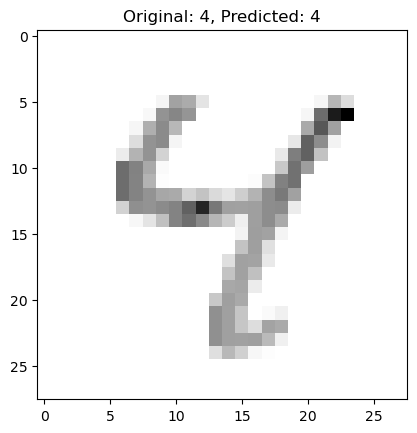

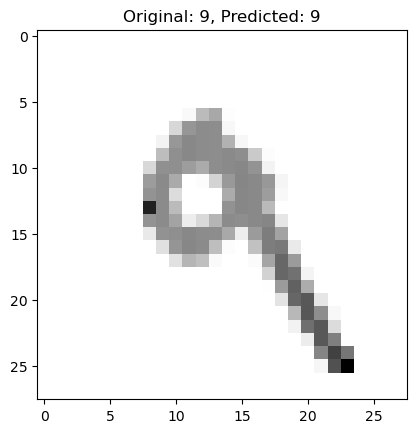

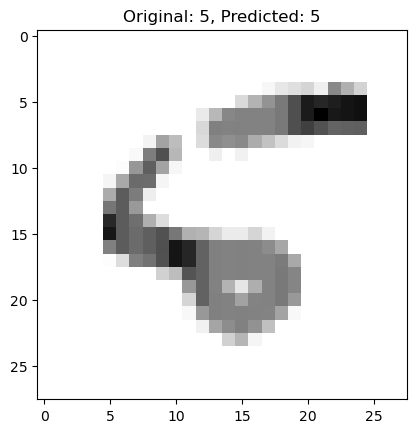

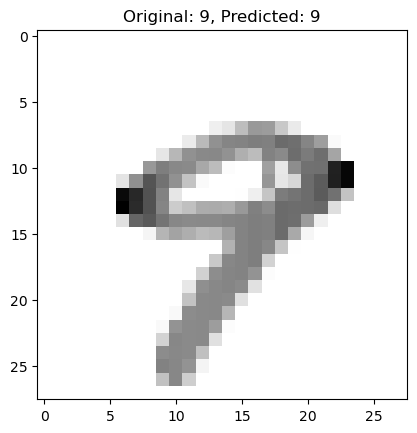

<Figure size 640x480 with 0 Axes>

In [157]:
for i in range(10):
    plt.imshow(test_img[i], cmap="binary")
    plt.title("Original: {}, Predicted: {}".format(test_lab[i], p[i]))
    plt.figure()

For some of the digits, I would have guessed something different (when the digit is 5, I would have guessed 6), but the model is very accurate and guessed it correctly. 

## Reflection

I am still trying to figure it out a bit. But by following the tutorial and finding out what everything meant, I did manage to understand it better already. I definitely want to improve my knowledge, so I will try it again without following a tutorial.

## Resources

- https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
- https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#What_Are_Optimizers_in_Deep_Learning?
- https://www.aiplusinfo.com/blog/what-is-the-adam-optimizer-and-how-is-it-used-in-machine-learning/
- https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/
- https://keras.io/api/layers/
- https://keras.io/api/models/